# Анализ бизнес показателей развлекательного приложения. Описание

# Цель:

Выяснить причины убыточности бизнеса.

# Задачи:

Провести анализ данных о посещениях приложения новыми пользователями в период с 2019-05-01 по 2019-10-27. 

# Данные:

В нашем распоряжении логи сервера о визитах, заказах и расходах.

Таблица `лог сервера с информацией о посещениях сайта`:

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица `информация о заказах`:

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица `информация о затратах на маркетинг`:

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Выгрузка данных. Подготовка к анализу

In [1]:
# импорт библиотек и методов
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

# # отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.float_format', '{:,.2f}'.format) # вывод всех значений в столбцах с двумя знаками после запятой
pd.set_option('display.max_columns', None) # вывод всех столбцов без скрытых за многоточием

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
else:
    print('Путь некорректный')


Путь некорректный


### Просмотр таблиц.Описание данных.

In [3]:
display(visits.head())
display(visits.info())
#visits.describe()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Таблица **visits** (visits_log_short-лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

In [4]:
display(orders.head())
display(orders.info())
orders.describe()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Revenue
count,"40,212.00","40,212.00"
mean,"499,029,531,203.23",5.37
std,"286,093,675,967.17",3.45
min,"599,326.00",4.99
25%,"251,132,440,436.75",4.99
50%,"498,283,972,665.00",4.99
75%,"743,332,711,780.00",4.99
max,"999,895,427,370.00",49.99


Таблица **orders** (orders_log_short-информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

In [5]:
display(costs.head())
display(costs.info())
costs.describe()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,costs
count,"1,800.00"
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


Таблица **costs** (costs_short - информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

### Выявленные проблемы в данных. Их корректировка.

In [6]:
# столбцы с датами имеют некорректный тип данных, поправим это:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [7]:
# наименования столбцов некорректны с точки зрения синтаксиса:
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

Index(['dt', 'Channel', 'costs'], dtype='object')

In [8]:
# понизим регистры:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [9]:
#приведем к змеинному виду:
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start','session end':'session_end'})
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

display(visits.head(1))
display(orders.head(1))
display(costs.head(1))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.30


Все строки таблиц заполнены, пропусков нет. Следующим шагом проверим таблицы на наличие дубликатов.

In [10]:
print('Количество явных дуликатов в таблице visits:', visits.duplicated().sum())
display(visits[visits.duplicated()].head())

Количество явных дуликатов в таблице visits: 0


,user_id,region,device,channel,session_start,session_end


In [11]:
print('Количество явных дуликатов в таблице orders:', orders.duplicated().sum())
display(orders[orders.duplicated()].head())

Количество явных дуликатов в таблице orders: 0


,user_id,event_dt,revenue


In [12]:
print('Количество явных дуликатов в таблице costs:', costs.duplicated().sum())
display(costs[costs.duplicated()].head())

Количество явных дуликатов в таблице costs: 0


,dt,channel,costs


В таблицах visits и costs данные в столбцах 'region', 'device', 'channel' - имеют явно категориальный тип данных, поэтому можно преобразовать их в данный тип, чтобы снизить использование памяти. Сделаем это:

In [13]:
visits['region'] = visits['region'].astype("category")
visits['device'] = visits['device'].astype("category")
visits['channel'] = visits['channel'].astype("category")
costs['channel'] = costs['channel'].astype("category")
visits.info(memory_usage='deep')
print()
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  category      
 2   device         309901 non-null  category      
 3   channel        309901 non-null  category      
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](2), int64(1)
memory usage: 8.0 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   dt       1800 non-null   object  
 1   channel  1800 non-null   category
 2   costs    1800 non-null   float64 
dtypes: category(1), float64(1), object(1)
memory usage: 87.2 KB


**Данные приведены в порядок. Можно приступить к подготовке к анализу.**

In [14]:
visits.describe()

,user_id
count,"309,901.00"
mean,"499,766,449,382.70"
std,"288,789,916,887.83"
min,"599,326.00"
25%,"249,369,122,776.00"
50%,"498,990,589,687.00"
75%,"749,521,111,616.00"
max,"999,999,563,947.00"


In [15]:
orders['revenue'].describe()

count   40,212.00
mean         5.37
std          3.45
min          4.99
25%          4.99
50%          4.99
75%          4.99
max         49.99
Name: revenue, dtype: float64

In [16]:
costs.describe()

,costs
count,"1,800.00"
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


In [17]:
# проверка сессий на аномалии
print(visits.query('session_start > session_end'))

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []


Итак мы имеем 3 датасета, аномалий в которых нет:
    
- датасет visits содержит данные с информацией о посещениях сайта в количестве 309901 записей в 6 колонках
- датасет orders содержит информацию о заказах в количестве 40212 записей в 3 колонках
- датасет costs содержит информацию о затратах на маркетинг в количестве 1800 записей в 3 колонках


### Функции для расчета и анализа LTV, ROI, удержания и конверсии

Пропишем функции для построения профилей пользователей, а также расчёта бизнес метрик.

#### get_profiles

In [18]:
# функция для получения пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

#     # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [19]:
# profiles = get_profiles(visits, orders, costs)
# print(profiles.head(5)) 

#### get_retention

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### get_conversion

In [21]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### get_ltv & ROI

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### filter_data (.rolling(window))

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### plot_retention

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### plot_conversion

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### plot_ltv_roi

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

In [27]:
# Построим профили пользователей:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23  


In [28]:
#проверим период привлечения новых пользователями, зарегистрировавшимися в программе, 
# как указано в аннотации в период с 2019-05-01 по 2019-10-27

# найдем минимальную и максимальную даты:
min_date = profiles['first_ts'].min()
min_date

Timestamp('2019-05-01 00:00:41')

In [29]:
max_date = profiles['first_ts'].max()
max_date

Timestamp('2019-10-27 23:59:04')

Проанализируем, из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей? Для этого сгруппируем данные по 'region', посчитаем количество строк в 'payer'== True по ним и отсортируем по убыванию:

In [30]:
# количество платящих пользователей по странам:
users_payer = profiles.query('payer == True').groupby(['region']).agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()
users_payer.columns = [['region', 'payed_users']]
users_payer

,region,payed_users
0,United States,6902
1,UK,700
2,France,663
3,Germany,616


In [31]:
# Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
users_payer_share = (
    profiles.groupby('region')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
# users_payer_share
users_payer_share.columns = ['total_users', 'paying_users', 'paying_share_%']
users_payer_share['paying_share_%'] = (users_payer_share['paying_share_%'] *100)
users_payer_share.style.format({'paying_share_%': '{:.2f}'})
users_payer_share.sort_values(by='paying_share_%', ascending=False)

,total_users,paying_users,paying_share_%
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


Наибольшее количество платящих пользователей дают США.

    Определим, какими устройствами пользуются платящие пользователи?
    С каких устройств чаще всего заходят платящие пользователи?

In [32]:
devices = (
    profiles.groupby('device')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
devices.columns = ['total_users', 'paying_users', 'paying_share_%']
devices['paying_share_%'] = (devices['paying_share_%'] *100)
devices.style.format({'paying_share_%': '{:.2f}'})
devices.sort_values(by='paying_share_%', ascending=False)

,total_users,paying_users,paying_share_%
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


In [33]:
devices = (
    profiles.query('region == "United States"')
    .groupby(['device'])
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
devices.columns = ['total_users', 'paying_users', 'paying_share_%']
devices['paying_share_%'] = (devices['paying_share_%'] *100)
devices.style.format({'paying_share_%': '{:.2f}'})
devices.sort_values(by='paying_share_%', ascending=False)

,total_users,paying_users,paying_share_%
device,,,
Android,20199,1487,7.36
Mac,24842,1706,6.87
PC,10432,715,6.85
iPhone,44529,2994,6.72


In [34]:
profiles.query('payer == True & region == "United States"').groupby('device').agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()

,device,payer
0,iPhone,2994
1,Mac,1706
2,Android,1487
3,PC,715


In [35]:
profiles.query('payer == True & region == "UK"').groupby('device').agg({'payer':'count'}).sort_values(by='payer', ascending=False)

,payer
device,
PC,301
Android,202
iPhone,134
Mac,63


Посмотрим, по каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [38]:
channels = (
    profiles.groupby('channel')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
channels.columns = ['total_users', 'paying_users', 'paying_share_%']
channels['paying_share_%'] = (channels['paying_share_%'] *100)
channels.style.format({'paying_share_%': '{:.2f}'})
channels.sort_values(by='paying_share_%', ascending=False)

,total_users,paying_users,paying_share_%
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


In [39]:
profiles.query('payer == True').groupby('channel').agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()

,channel,payer
0,FaceBoom,3557
1,TipTop,1878
2,organic,1160
3,WahooNetBanner,453
4,AdNonSense,440
5,RocketSuperAds,352
6,LeapBob,262
7,OppleCreativeMedia,233
8,lambdaMediaAds,225
9,YRabbit,165


In [40]:
profiles.query('payer == True & region == "United States"').groupby('channel').agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()

,channel,payer
0,FaceBoom,3557
1,TipTop,1878
2,organic,794
3,RocketSuperAds,352
4,YRabbit,165
5,MediaTornado,156


In [41]:
profiles.query('payer == True & region == "UK"').groupby('channel').agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()

,channel,payer
0,WahooNetBanner,153
1,AdNonSense,148
2,organic,131
3,LeapBob,103
4,OppleCreativeMedia,89
5,lambdaMediaAds,76


In [42]:
profiles.query('payer == True & region == "France"').groupby('channel').agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()

,channel,payer
0,WahooNetBanner,152
1,AdNonSense,150
2,organic,109
3,LeapBob,90
4,lambdaMediaAds,82
5,OppleCreativeMedia,80


In [43]:
profiles.query('payer == True & region == "Germany"').groupby('channel').agg({'payer':'count'}).sort_values(by='payer', ascending=False).reset_index()

,channel,payer
0,WahooNetBanner,148
1,AdNonSense,142
2,organic,126
3,LeapBob,69
4,lambdaMediaAds,67
5,OppleCreativeMedia,64


In [44]:
# profiles.query('payer == True').groupby([ 'region','channel']).agg({'payer':'count'}).sort_values(by='payer', ascending=False)

Согласно проведенному выше анализу, заметим, что:
- наибольшее количество платящих пользователей дают США.
- всего каналов привлечения - 11. каналы привлечения в США и странах Европы(UK, Germany, France) отличаются кардинально и таким образом, что можно страны Европы объединить по каналам, а США стоит отдельно. И действительно логично то, что на разных континентах каналы привлечения  отличаются, а в рамках одного континента - Европы - совпадают. Это просто наблюдение на текущий момент.
- по устройствам, с которых пользователи заходят на сайт, в общей сводке лидируют iPhone, но если смотреть по регионам, то в США лидируют iPhone, в Европе же PC(персональные компьютеры)

## Маркетинг

In [45]:
print(profiles.head(1))
display(costs.head(1))

   user_id            first_ts   channel device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   

       month  payer  acquisition_cost  
0 2019-05-01   True              1.09  


,dt,channel,costs
0,2019-05-01,FaceBoom,113.30


In [46]:
total_costs = costs['costs'].sum()
total_costs = total_costs.round(2)
print('Общая сумма затрат на рекламу:', total_costs)

Общая сумма затрат на рекламу: 105497.3


In [47]:
costs_by_channel = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
costs_by_channel

,channel,costs
0,TipTop,"54,751.30"
1,FaceBoom,"32,445.60"
2,WahooNetBanner,"5,151.00"
3,AdNonSense,"3,911.25"
4,OppleCreativeMedia,"2,151.25"
5,RocketSuperAds,"1,833.00"
6,LeapBob,"1,797.60"
7,lambdaMediaAds,"1,557.60"
8,MediaTornado,954.48
9,YRabbit,944.22


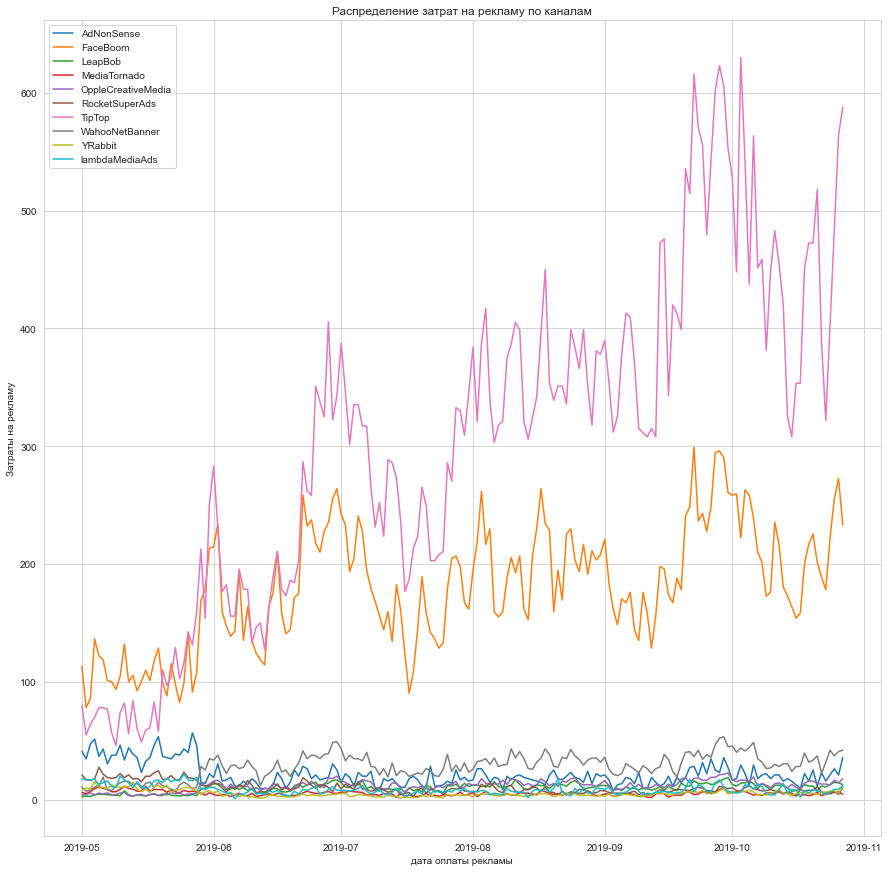

In [48]:
plt.figure(figsize = (15,15))
sns.set_style('whitegrid')
sns.lineplot(data=costs, x='dt', y='costs', hue='channel', ci=None)
plt.ylabel('Затраты на рекламу')
plt.xlabel('дата оплаты рекламы')
plt.title('Распределение затрат на рекламу по каналам')
# Add a legend and informative axis label
plt.legend(loc="upper left")
plt.show()

Самые большие затраты пришлись на каналы FaceBoom и TipTop в USA. В то же время они принесли наибольшее количество платящих пользователей в Америке. Остальные каналы привлекали меньшее количество пользователей, и инвестиции в них были меньше. Тем не менее лидерами по инвестициям и числу платящих пользователей оказались WahooNetBanner и AdNonSense.

Посмотрим, сколько в среднем стоило привлечение одного пользователя из каждого источника. 
Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. 

In [49]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09


In [50]:
cac = profiles['acquisition_cost'].mean()
print('средний CAC на одного пользователя для всего проекта:', cac.round(2))

средний CAC на одного пользователя для всего проекта: 0.7


In [51]:
cac_channel = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False).reset_index()
cac_channel.columns = ['channel', 'cac']
cac_channel.round(2)

,channel,cac
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


С точки зрения вложений на одного пользователя самыми дорогими оказались пользователи, привлеченные через каналы TipTop, FaceBoom, AdNonSense.

## Окупаемость рекламы для привлечения пользователей

### Общая окупаемость рекламы

Установим момент и горизонт анализа данных. За момент анализа возьмем максимальную дату привлечения пользователей max_date, и зададим 2х-недельный горизонт анализа.

In [52]:
observation_date = max_date # момент анализа
horizon_days = 7  # горизонт анализа 

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

Добавим фильтр по органике, так как нам нужно понять именно окупаемость по платным каналам:

In [53]:
profiles_ch = profiles.query('channel != "organic"')

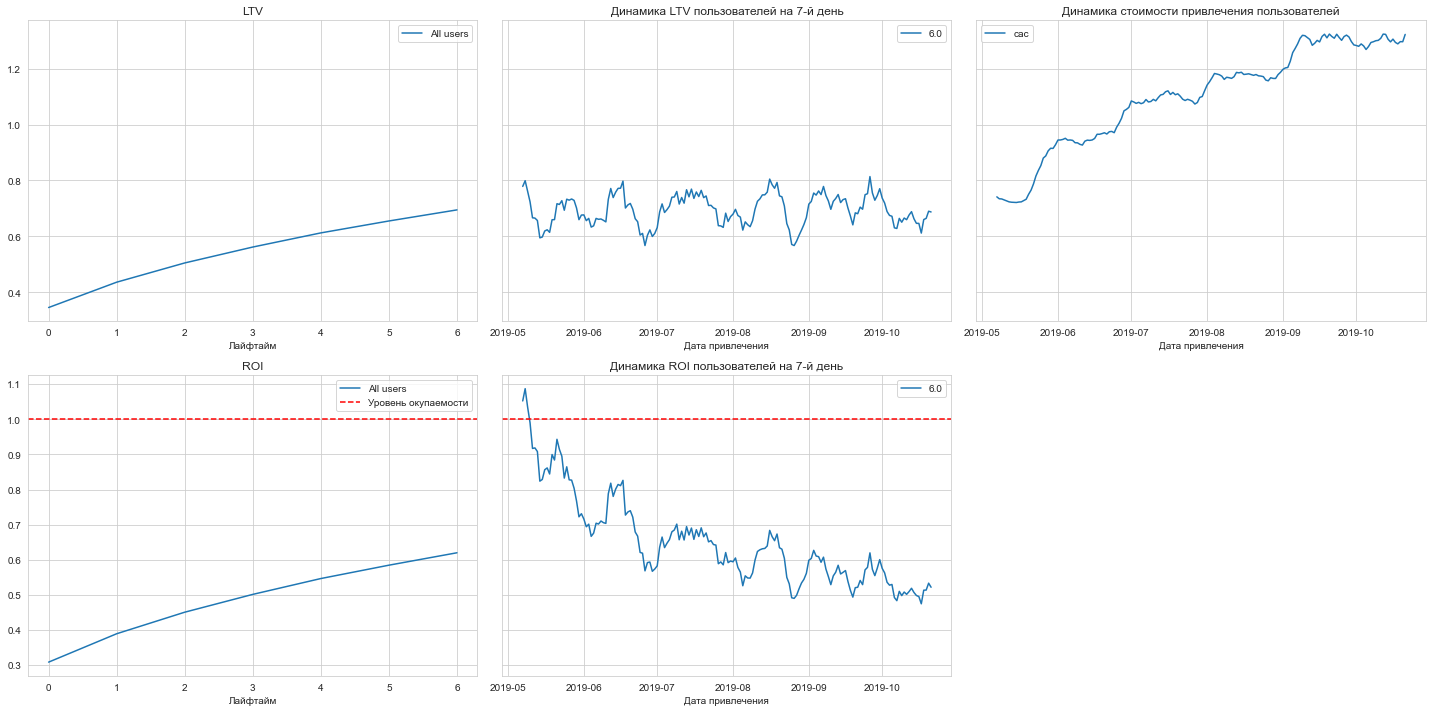

In [54]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days) 
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается: ROI в конце недели еле достигает 60%. САС постоянно растет, возможно излишние затраты на рекламу приводят к отсутствию окупаемости. LTV (lifetimevalue) растет и в динамике довольно стабилен. При этом ROI в динамике сильно падает.

### Окупаемость рекламы с разбивкой по устройствам

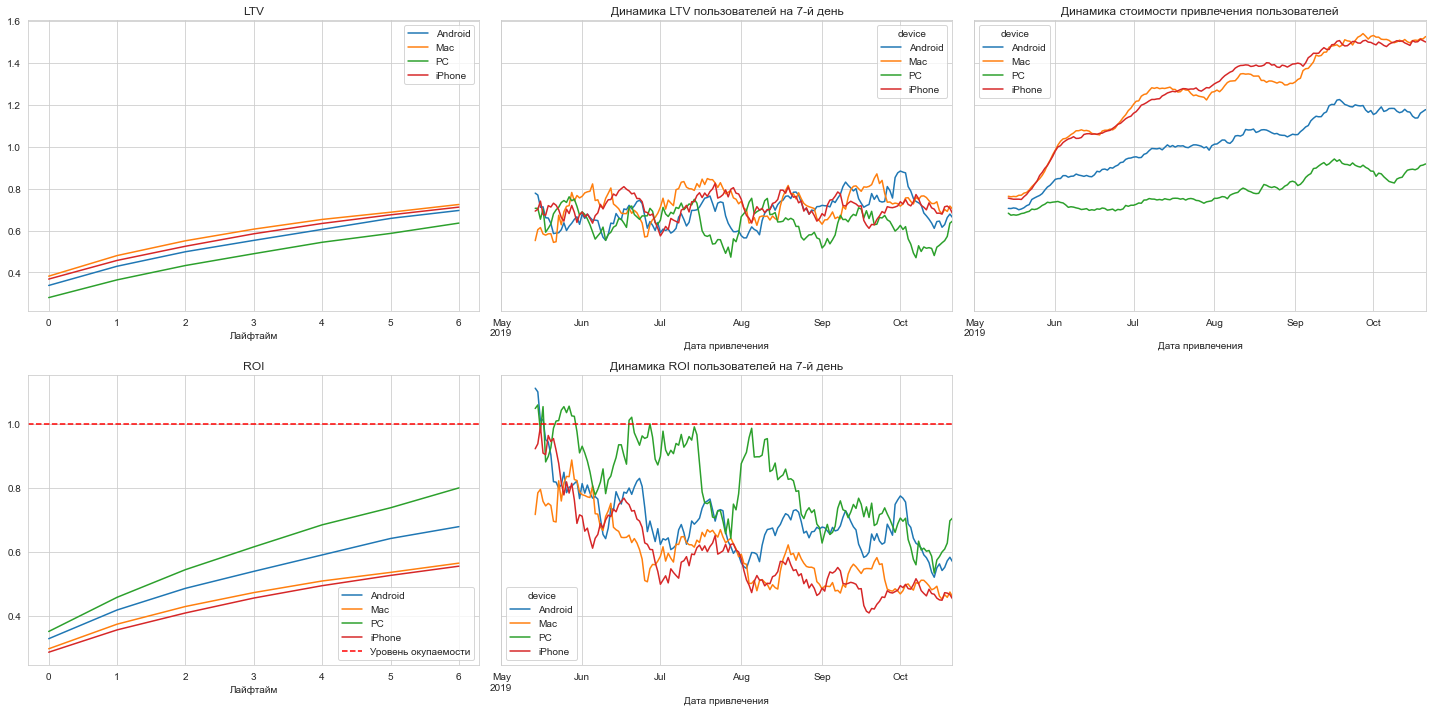

In [55]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупается ни по одному из устройств. Раз все устройства убыточны, дело не в устройствах, с которых пользователи заходят на платформу.

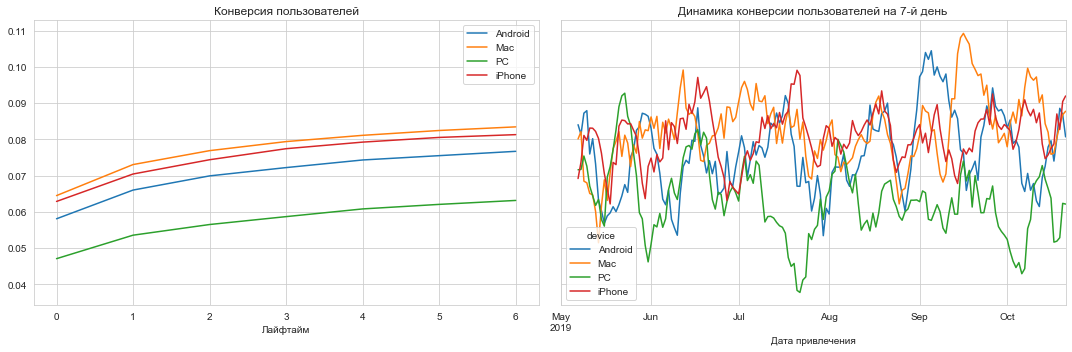

In [56]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ch, orders, observation_date, horizon_days, dimensions=dimensions 
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи устройств конвертируются хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

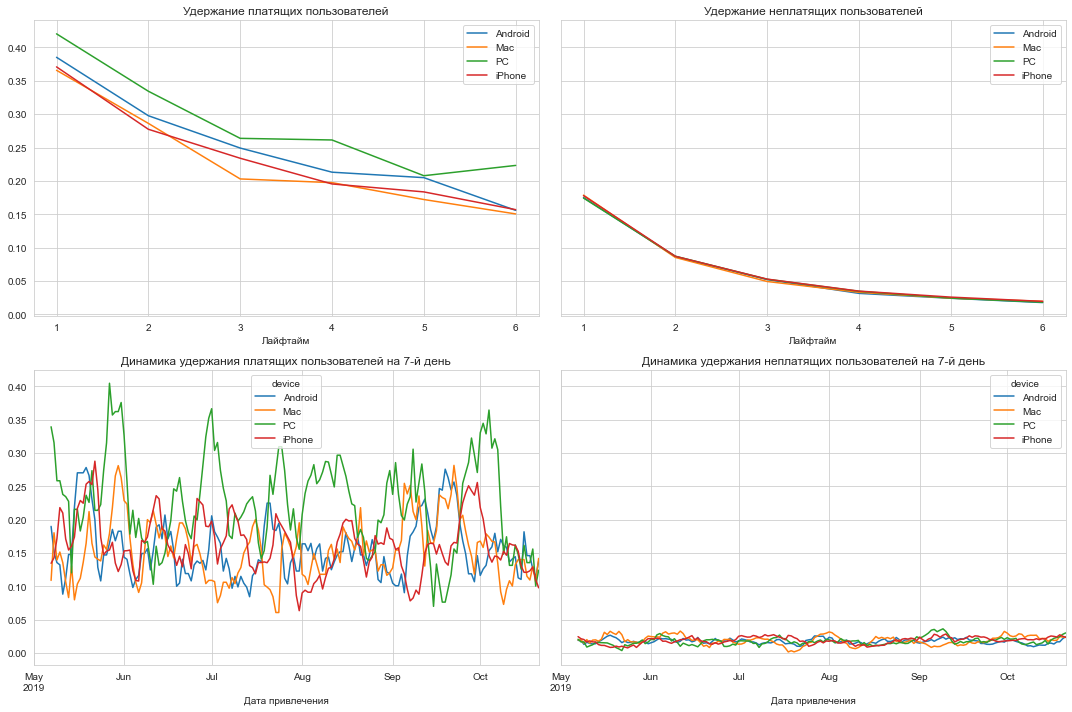

In [57]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ch, visits, observation_date, horizon_days, dimensions = ['device'] 
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по устройствам имеет примерно одинаковое распределение. Значит дело не в устройствах.

### Окупаемость рекламы с разбивкой по странам

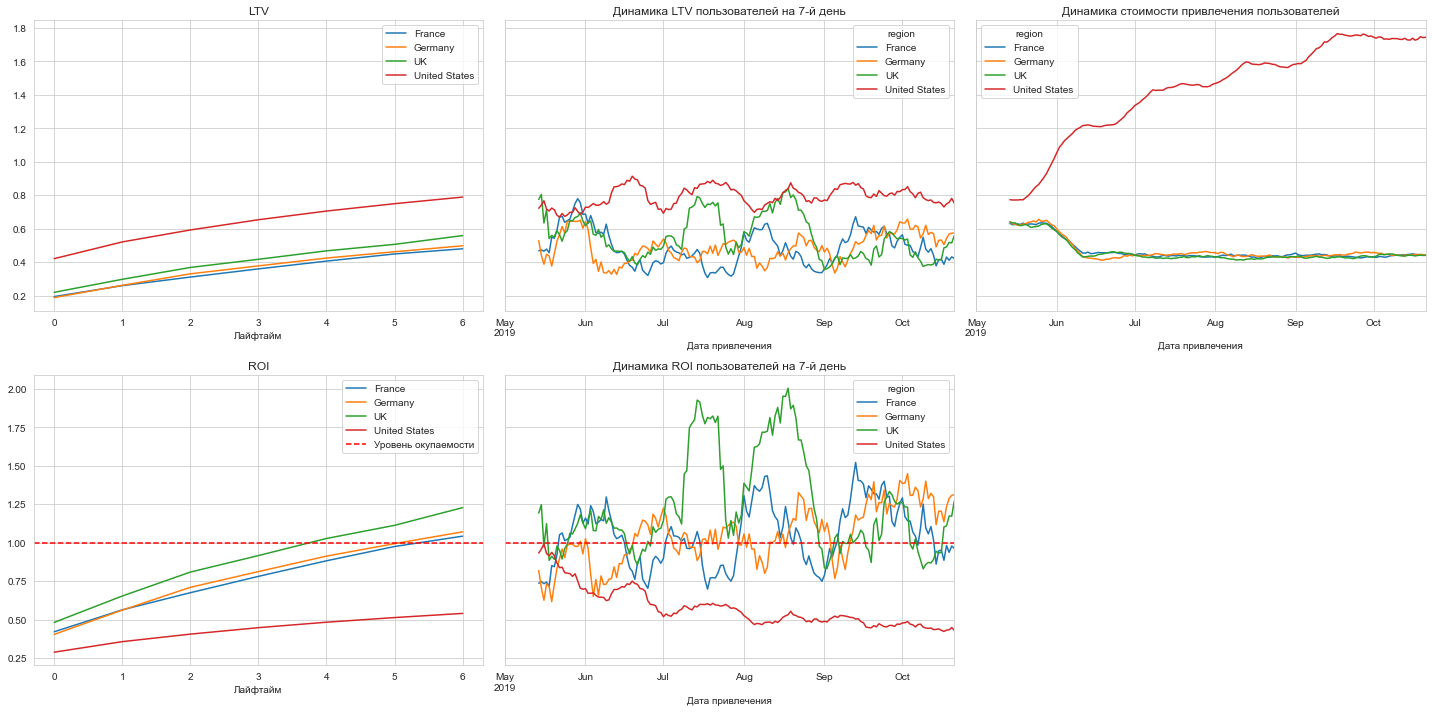

In [58]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=dimensions 
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Сортировка по странам выявила явного аутсайдера: United States. Это наиболее затратная страна с точки зрения инвестиций. ROI самый низкий и в динамике именно по USA этот показатель падает. При этом в остальных странах ROI превысил точку окупаемости, и в динамике ROI достаточно стабилен. Также мы видим, что CAC по всем странам стабилен, в отличие от USA: сколько ни вкладывай, окупаемость падает со временем.

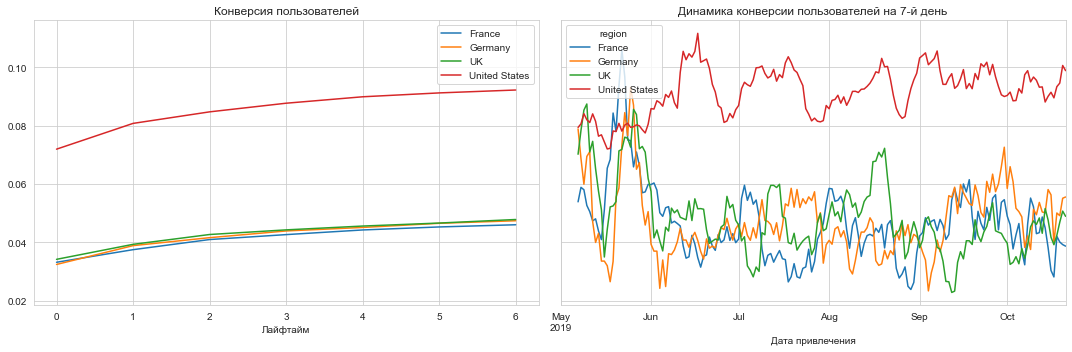

In [59]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ch, orders, observation_date, horizon_days, dimensions=dimensions 
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам пользователи из США конвертируются хорошо, в том числе и в динамике. Возможно дело в удержании.

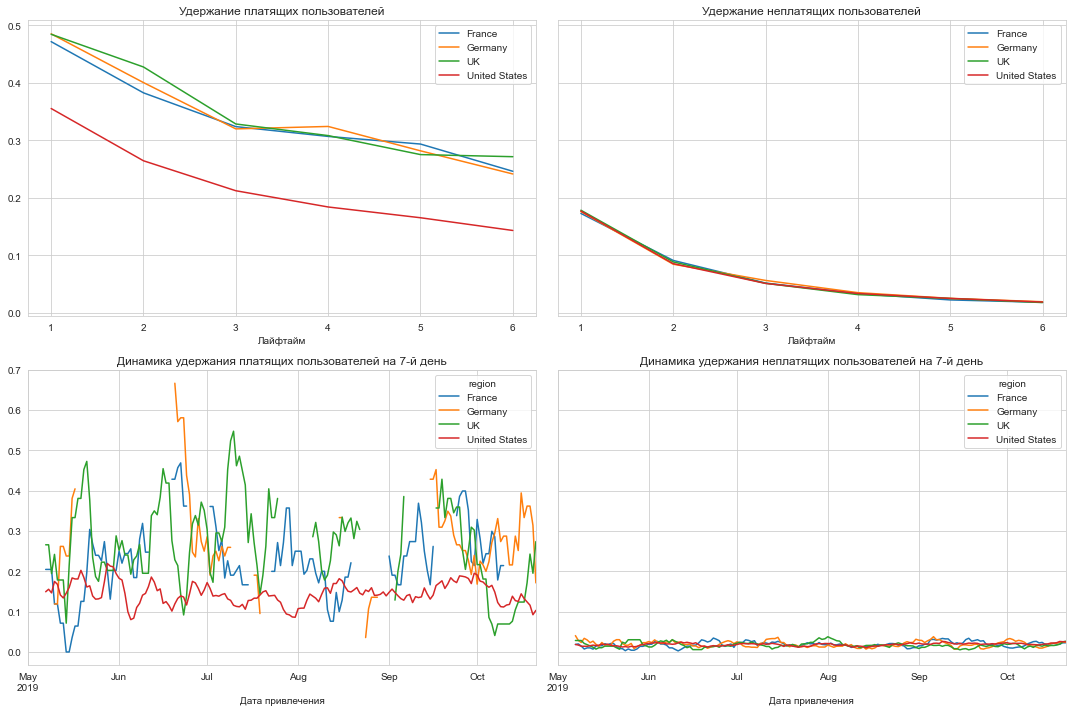

In [60]:
# смотрим удержание с разбивкой по странам


retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ch, visits, observation_date, horizon_days, dimensions = ['region'] 
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи из США удерживаются хуже всех стран. Для платящих пользователей из США удержание 7-го дня ниже, чем в остальных странах, примерно на 25%. 
Скорее всего, причина в том, что не учтены национальные особенности страны, в которой пытаются продвигать продукт.

### Окупаемость рекламы с разбивкой по рекламным каналам

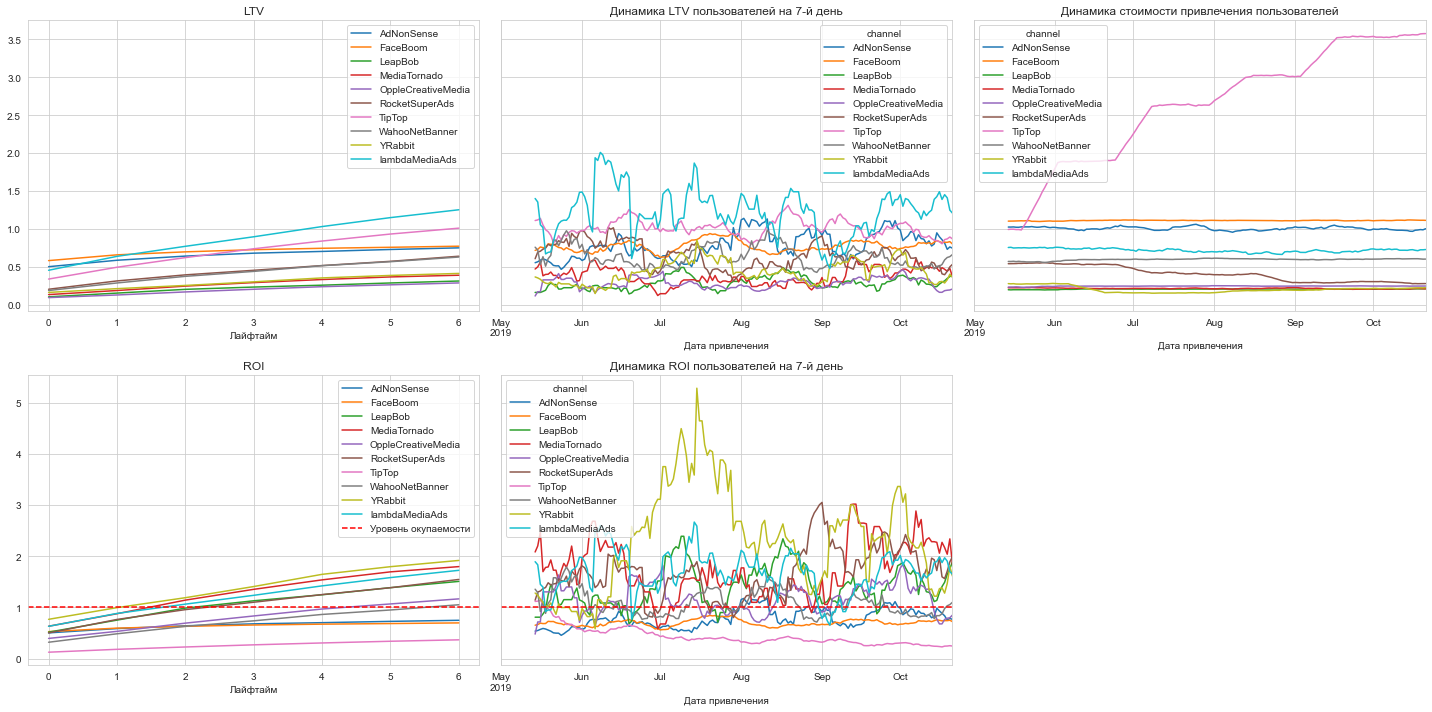

In [61]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']
# исключаем из выборки канал organiс, так как он естественный, не требовал инвестиций
profiles_ch = profiles.query('channel != "organic"') 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

С точки зрения привлечения по каналам, точки окупаемость не достигли каналы AdNonSense, FaceBoom и TipTop. По остальным каналам наблюдаем достаточную стабильность ROI, LTV и CAC.

Попробуем выявить причины, по которым три канала не окупаются:

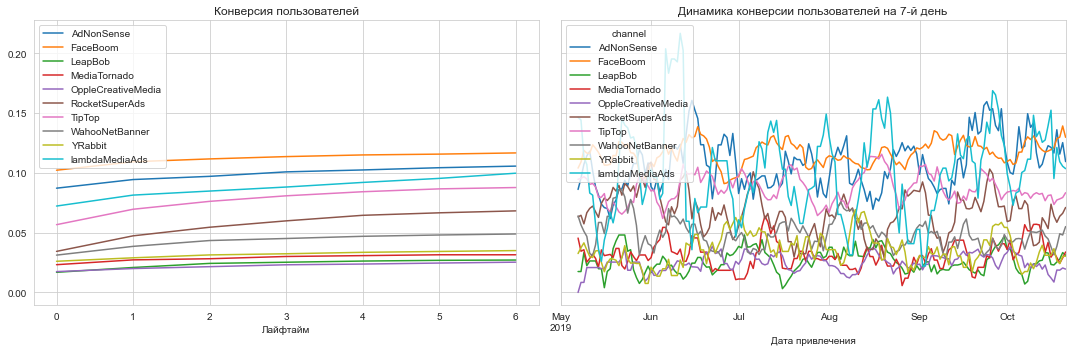

In [62]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ch, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конвертация каналов достаточна. Возможно дело в удержании.

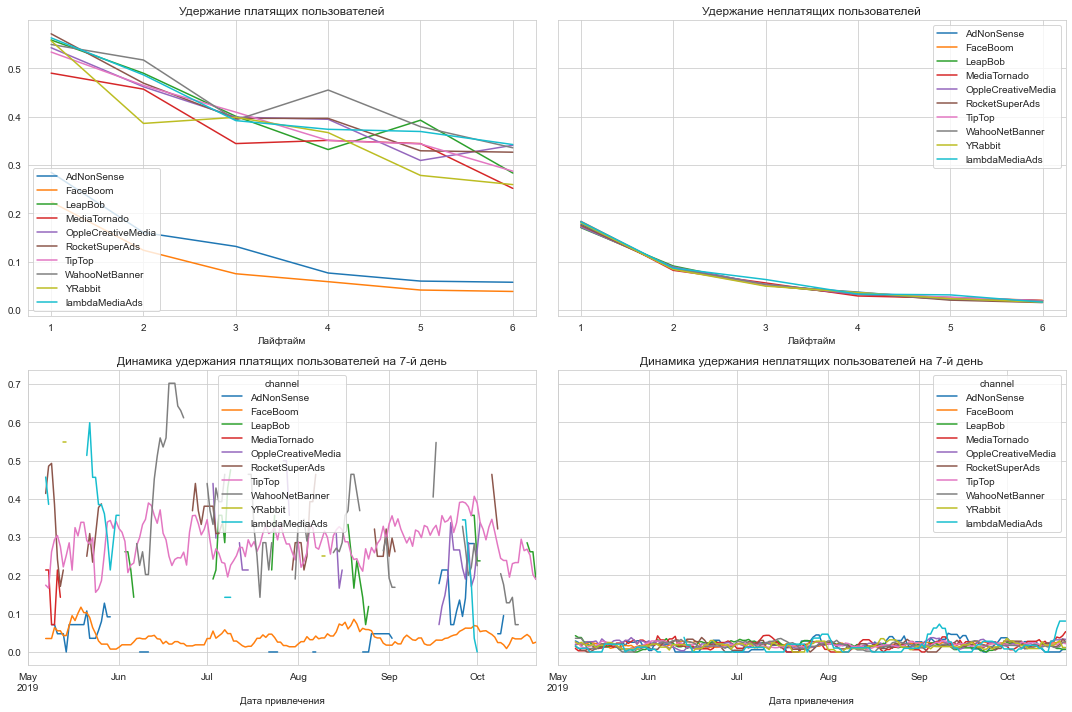

In [63]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ch, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Что касается каналов привлечения, то пользователи, приходящие по каналам AdNonSense и FaceBoom удерживаются хуже всех. Для платящих пользователей этих каналов удержание 7-го дня значительно ниже, чем по остальным каналам, примерно на 40%.  И это очень низкий показатель.
Стоит изучить подробнее эти каналы, чтобы правильно выстроит дальнейшую стратегию маркетинга. При этом канал TipTop удерживается хорошо.

Отфильтруем данные по США и построим отчет по каналам, действующим в США, затем оценим для них конверсию и удержание (также можно построить ROI, LTV, CAC)
    
Каналы. работающие в USA:
- FaceBoom	
- TipTop
- RocketSuperAds
- YRabbit
- MediaTornado	

In [64]:
profiles_usa = profiles_ch.query('region == "United States"')

In [65]:
# посмотрим долю каналов в привлечении пользователей, какой % составляет привлечение по ним.
channels_share_usa = (
    profiles_usa.groupby('channel')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
channels_share_usa.columns = ['total_users', 'paying_users', 'paying_share_%']
channels_share_usa['paying_share_%'] = (channels_share_usa['paying_share_%'] *100)
channels_share_usa.style.format({'paying_share_%': '{:.2f}'})
channels_share_usa.sort_values(by='paying_share_%', ascending=False)

,total_users,paying_users,paying_share_%
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57


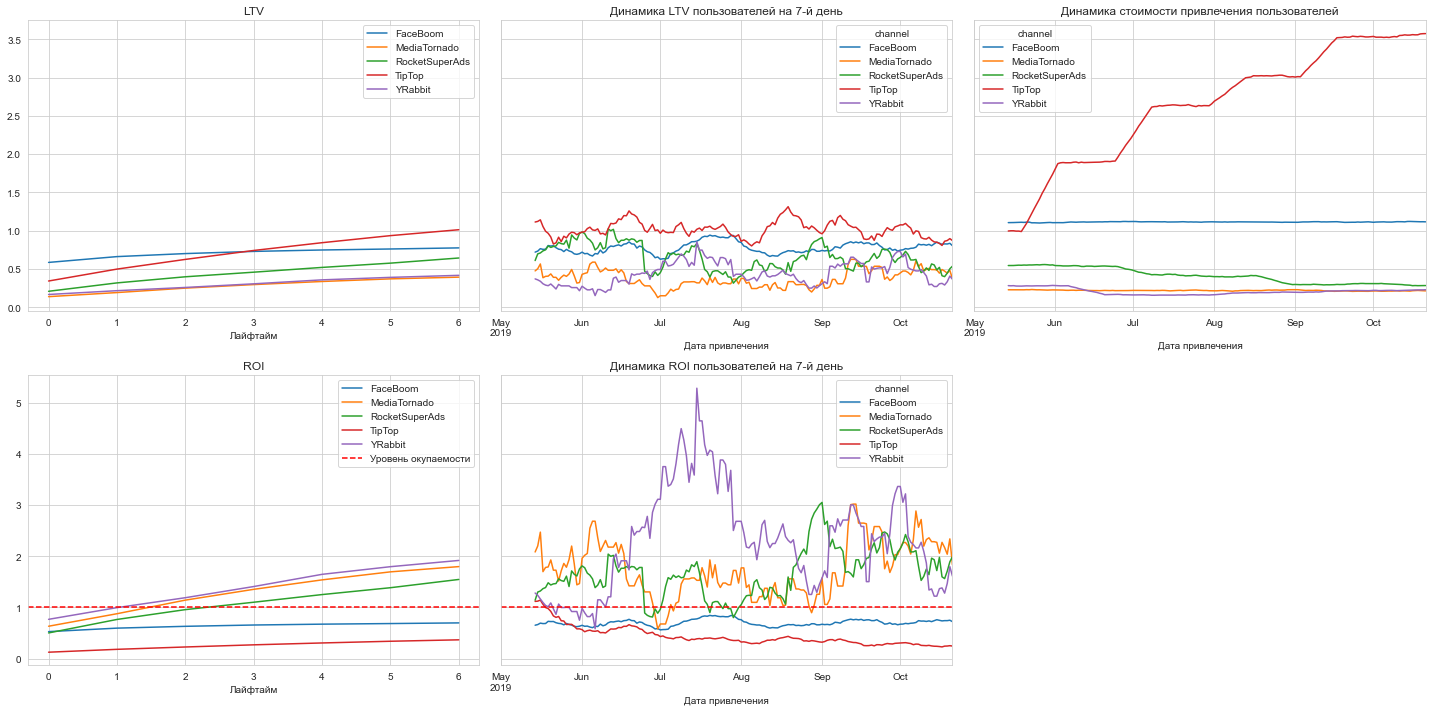

In [66]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

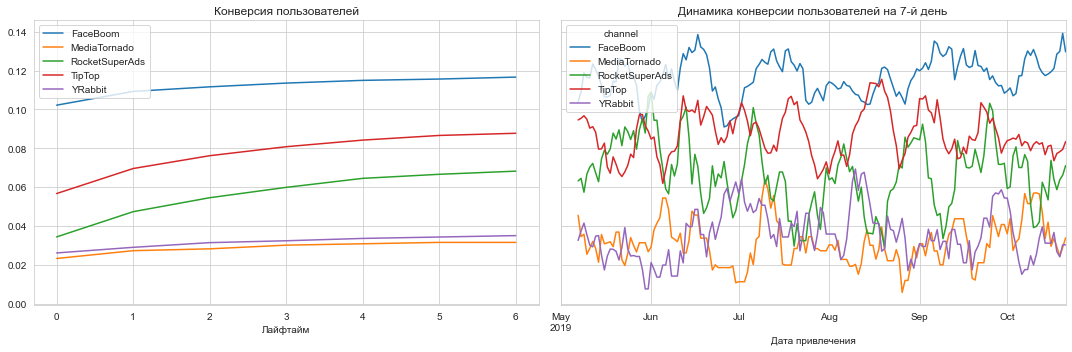

In [67]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

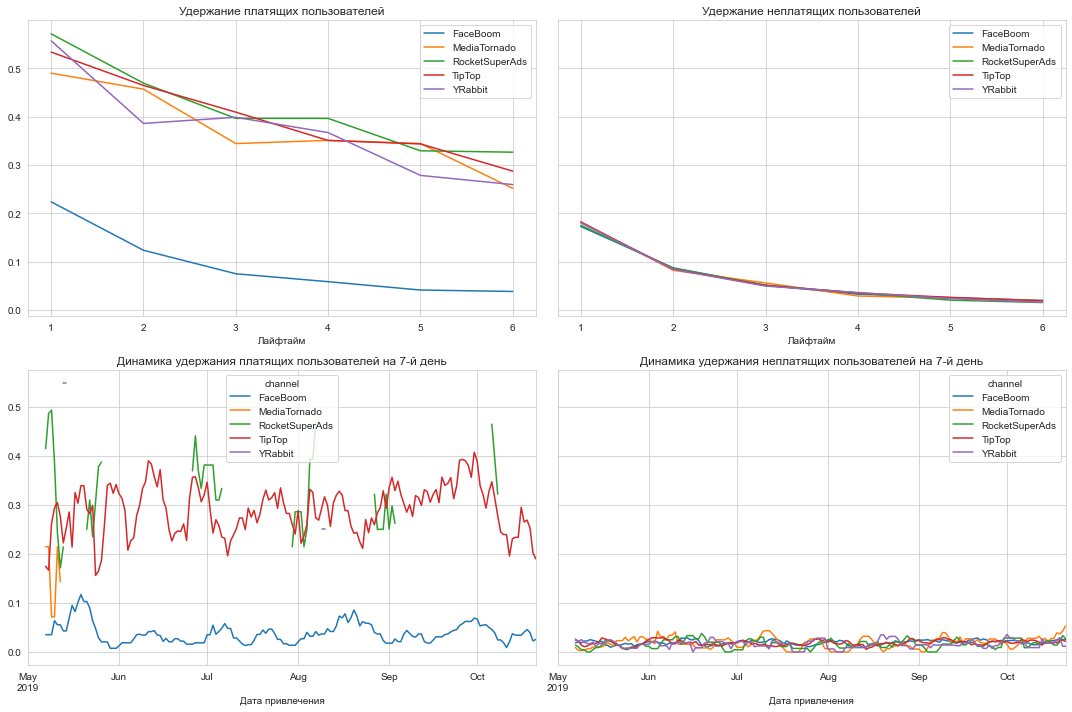

In [68]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

ИТАК, два канала в США: FaceBoom и TipTop имеют самое большое число привлеченных платящих пользователей. Оба канала хорошо конвертируются, но удержание FaceBoom гораздо ниже остальных. При этом ни тот, ни другой не окупаются, а на TipTop затраты при этом постоянно и значительно растут тогда, как на остальных каналах инвестиции стабильны.

Теперь отфильтруем данные по Европе и построим отчет по каналам, действующим в Европе, затем оценим для них конверсию и удержание, также можно построить ROI, LTV, CAC)
    
Каналы. работающие в Европе:
- WahooNetBanner
- AdNonSense
- LeapBob
- OppleCreativeMedia
- lambdaMediaAds	

In [69]:
profiles_eu = profiles_ch.query('region != "United States"')

In [70]:
# посмотрим долю каналов в привлечении пользователей, какой % составляет привлечение по ним.
channels_share_eu = (
    profiles_eu.groupby('channel')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
channels_share_eu.columns = ['total_users', 'paying_users', 'paying_share_%']
channels_share_eu['paying_share_%'] = (channels_share_eu['paying_share_%'] *100)
channels_share_eu.style.format({'paying_share_%': '{:.2f}'})
channels_share_eu.sort_values(by='paying_share_%', ascending=False)

,total_users,paying_users,paying_share_%
channel,,,
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
WahooNetBanner,8553,453,5.30
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71


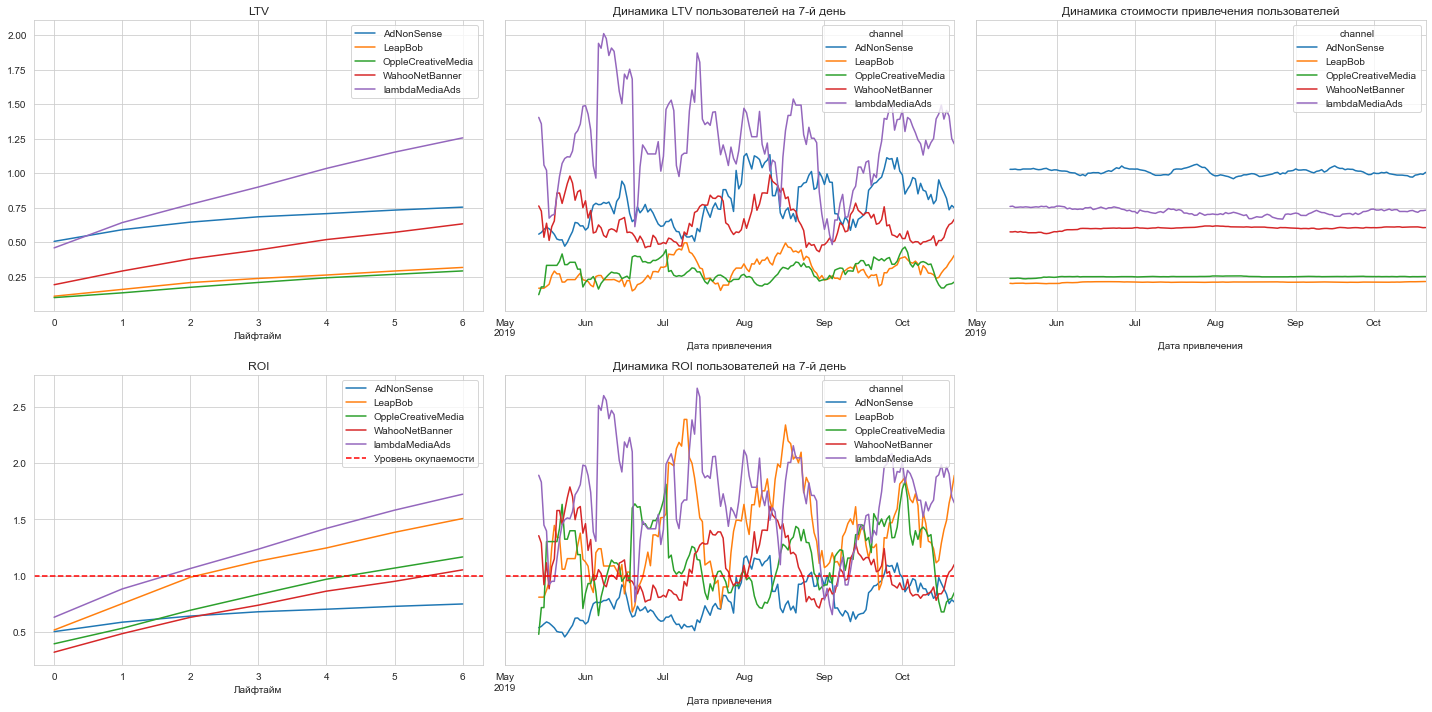

In [71]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

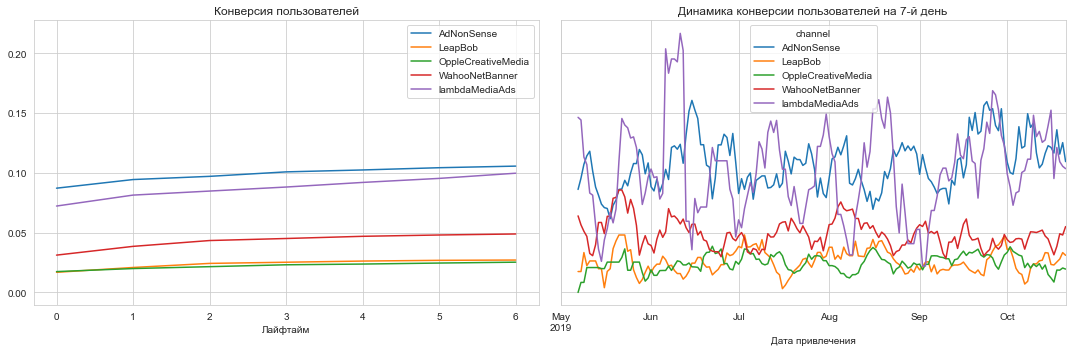

In [72]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

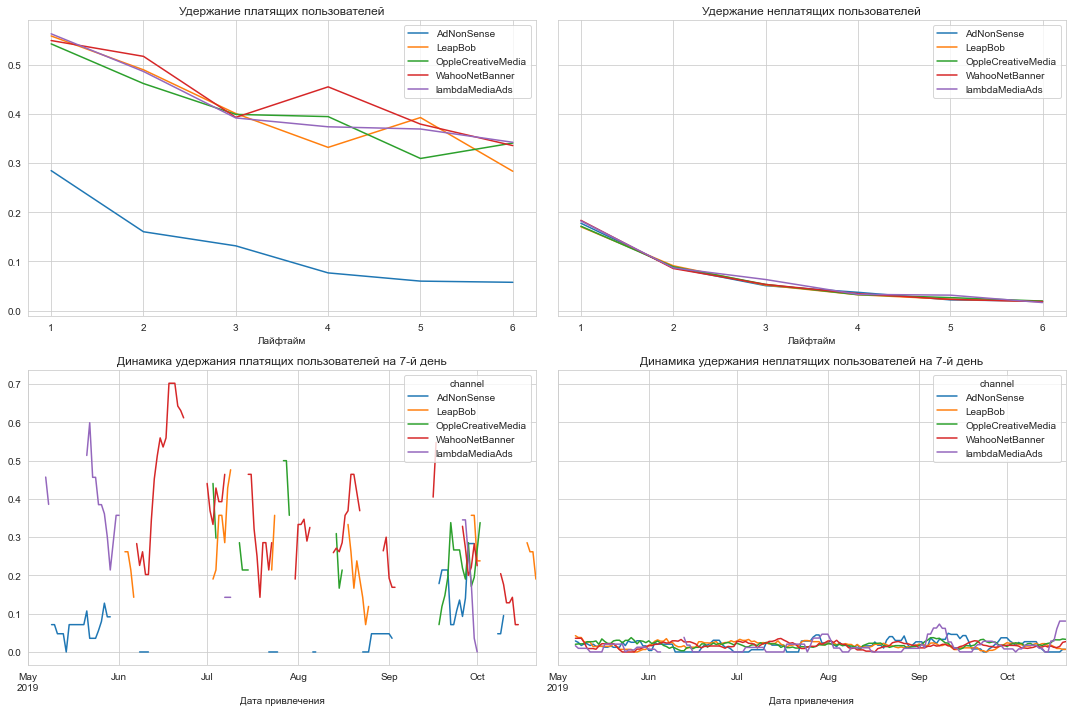

In [73]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eu, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

ИТАК, в Европе канал AdNonSense имеет самое большое число привлеченных платящих пользователей. Канал хорошо конвертируется, но его удержание гораздо ниже остальных. Канал не окупается, хотя затраты на рекламу стабильны.

## Выводы

Итак, причинами неэффективности привлечения пользователей явились неверная тактика в направлении выбора страны, в данном случае United States. А также подводят два канала рекламы: AdNonSense и FaceBoom. При этом канал FaceBoom работает только на территории United States, что дает еще больше поводов для более подбробного изучения причин неэффективности инвестиций в эту страну на текущем этапе.

    Нужно выяснить:
    - возможно игра непопулярна среди пользователей;
    - или пользователи столкнулись с какими-то проблемами на сайте;
    - запросить доп. базы данных, отражающие логи событий на сайте и проанализировать их.
    
Что касается второго выявленного канала, то возможно стоит отказаться от вложений в него.

Резюмируя все вышесказанное, есть предложение обратить внимание на следующие каналы продвижения:
    
- в США - RocketSuperAds. У него наиболее сбалансированное сочетание всех показателей.
- в Европе - lambdaMediaAds и может быть еще WahooNetBanner	